In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DataFrame is like an in-memory relational database table
  * Let's create a table with Quiz-1, Quiz-2 data and do some visualization

In [17]:
quiz_df_obj = pd.DataFrame({'Stud #':['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20'],
                            'Quiz-1':[5,6,9,7,5,7,9,6,9,6,8,7,8,6,8,8,7,6,7,6],
                            'Quiz-2':[6,6,7,5,8,8,4,9,7,4,5,9,10,6,10,9,5,10,5,7]})

In [18]:
quiz_df_obj.head()

,Stud #,Quiz-1,Quiz-2
0,s1,5,6
1,s2,6,6
2,s3,9,7
3,s4,7,5
4,s5,5,8


In [19]:
quiz_df_obj.tail()

,Stud #,Quiz-1,Quiz-2
15,s16,8,9
16,s17,7,5
17,s18,6,10
18,s19,7,5
19,s20,6,7


In [20]:
type(quiz_df_obj)

pandas.core.frame.DataFrame

* **Access one column from DataFrame**

In [24]:
quiz_df_obj['Quiz-1']

0     5
1     6
2     9
3     7
4     5
5     7
6     9
7     6
8     9
9     6
10    8
11    7
12    8
13    6
14    8
15    8
16    7
17    6
18    7
19    6
Name: Quiz-1, dtype: int64

* **Let's do some visualization**

In [29]:
quiz_df_obj['Quiz-1'].value_counts()

6    6
7    5
8    4
9    3
5    2
Name: Quiz-1, dtype: int64

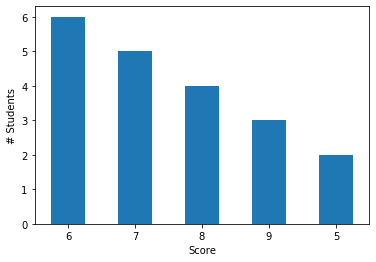

In [39]:
ax1 = quiz_df_obj['Quiz-1'].value_counts().plot.bar(rot=0)
xlable1 = plt.xlabel('Score')
ylable1 = plt.ylabel('# Students')
yticks1 = plt.yticks([0,1,2,3,4,5,6])

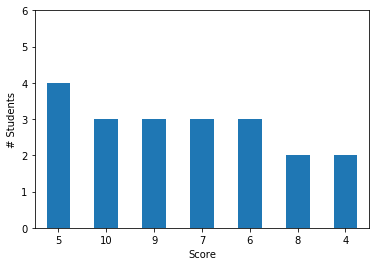

In [40]:
ax2 = quiz_df_obj['Quiz-2'].value_counts().plot.bar(rot=0)
xlable2 = plt.xlabel('Score')
ylable2 = plt.ylabel('# Students')
yticks2 = plt.yticks([0,1,2,3,4,5,6])

* **Box Whisker Plot** visualizing interquartile range

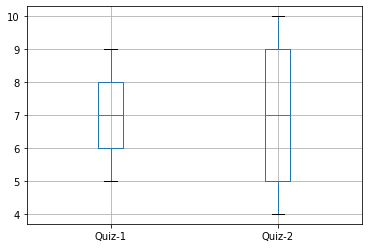

In [37]:
boxplot = quiz_df_obj.boxplot(column=['Quiz-1', 'Quiz-2'])

* **Let's add a new column "College" to the DataFrame**

In [41]:
quiz_df_obj['College'] = ["st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college","st.mary's college","st. xavier's college"]

In [42]:
quiz_df_obj.head()

,Stud #,Quiz-1,Quiz-2,College
0,s1,5,6,st.mary's college
1,s2,6,6,st. xavier's college
2,s3,9,7,st.mary's college
3,s4,7,5,st. xavier's college
4,s5,5,8,st.mary's college


* **Let's drop "Stud #" column as it may not be useful**

In [48]:
quiz_df_obj.drop("Stud #", axis=1, inplace=True)

In [49]:
quiz_df_obj.columns

Index(['Quiz-1', 'Quiz-2', 'College'], dtype='object')

In [50]:
quiz_df_obj.head()

,Quiz-1,Quiz-2,College
0,5,6,st.mary's college
1,6,6,st. xavier's college
2,9,7,st.mary's college
3,7,5,st. xavier's college
4,5,8,st.mary's college


In [51]:
quiz_df_obj.mean()

Quiz-1    7.0
Quiz-2    7.0
dtype: float64

In [52]:
quiz_df_obj.describe()

,Quiz-1,Quiz-2
count,20.000000,20.000000
mean,7.000000,7.000000
std,1.256562,2.026145
min,5.000000,4.000000
25%,6.000000,5.000000
50%,7.000000,7.000000
75%,8.000000,9.000000
max,9.000000,10.000000


In [49]:
quiz_df_obj.groupby(quiz_df_obj['College']).size()

College
st. xavier's college    10
st.mary's college       10
dtype: int64

In [53]:
quiz_df_obj.groupby('College')

In [51]:
for key, group in quiz_df_obj.groupby('College'):
    print("This is the %s group" %key)
    print(group)

This is the st. xavier's college group
    Quiz-1  Quiz-2               College
1        6       6  st. xavier's college
3        7       5  st. xavier's college
5        7       8  st. xavier's college
7        6       9  st. xavier's college
9        6       4  st. xavier's college
11       7       9  st. xavier's college
13       6       6  st. xavier's college
15       8       9  st. xavier's college
17       6      10  st. xavier's college
19       6       7  st. xavier's college
This is the st.mary's college group
    Quiz-1  Quiz-2            College
0        5       6  st.mary's college
2        9       7  st.mary's college
4        5       8  st.mary's college
6        9       4  st.mary's college
8        9       7  st.mary's college
10       8       5  st.mary's college
12       8      10  st.mary's college
14       8      10  st.mary's college
16       7       5  st.mary's college
18       7       5  st.mary's college


### Let's try to understand processing nulls DataFrame

In [52]:
df_na = pd.DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]], columns=['one', 'two', 'three'])

In [53]:
df_na

,one,two,three
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [54]:
df_na.isnull()

,one,two,three
0,False,False,False
1,True,False,False
2,False,True,False
3,True,True,True


In [57]:
df_na.isnull().any(axis=0)

one      True
two      True
three    True
dtype: bool

In [59]:
df_na.isnull().all(axis=0)

one      False
two      False
three    False
dtype: bool

In [60]:
df_na.dropna()

,one,two,three
0,1.0,2.0,3.0


In [61]:
#We can drop rows with all nulls
df_na.dropna(how='all', axis=0)

,one,two,three
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [62]:
df_na.fillna(1880)

,one,two,three
0,1.0,2.0,3.0
1,1880.0,5.0,6.0
2,7.0,1880.0,9.0
3,1880.0,1880.0,1880.0


In [63]:
#Can also fill in diff values for diff columns
df_na.fillna({'one':33,'two':66,'three':99})

,one,two,three
0,1.0,2.0,3.0
1,33.0,5.0,6.0
2,7.0,66.0,9.0
3,33.0,66.0,99.0


### More on DataFrames

In [64]:
#DataFrames can be constructed in many ways. Another way is from a dictionary of equal length lists
data = {'city':['Alma','Brian','Fox Park'],
        'Population':[837000,3880000,8400000]}

city_frame = pd.DataFrame(data)

city_frame

,city,Population
0,Alma,837000
1,Brian,3880000
2,Fox Park,8400000


In [65]:
#Now let's say we wanted to add a column for the States, we can do that with a mapping.
state_map_dict ={'Alma':'Colorado','Brian':'Utah','Fox Park':'Wyoming'}

In [68]:
city_frame['city'].map(state_map_dict)

0    Colorado
1        Utah
2     Wyoming
Name: city, dtype: object

In [69]:
# Now we can map that data to our current dframe
city_frame['state'] = city_frame['city'].map(state_map_dict)

In [70]:
city_frame

,city,Population,state
0,Alma,837000,Colorado
1,Brian,3880000,Utah
2,Fox Park,8400000,Wyoming


* **Merge two DataFrames**

In [71]:
altitude_frame = pd.DataFrame({'city':['Alma','Brian','Fox Park'],
                       'altitude':[3158,3000,2762]})
altitude_frame

,city,altitude
0,Alma,3158
1,Brian,3000
2,Fox Park,2762


In [72]:
result = pd.concat([city_frame, altitude_frame], axis=1, join='inner')

In [73]:
result

,city,Population,state,city,altitude
0,Alma,837000,Colorado,Alma,3158
1,Brian,3880000,Utah,Brian,3000
2,Fox Park,8400000,Wyoming,Fox Park,2762


In [74]:
city_frame[['city', 'altitude']] = altitude_frame

In [75]:
city_frame

,city,Population,state,altitude
0,Alma,837000,Colorado,3158
1,Brian,3880000,Utah,3000
2,Fox Park,8400000,Wyoming,2762


* **Differences between LOC, iLOC.**
* **Update a cell value in DataFrame.**

In [76]:
city_frame.iloc[1]

city            Brian
Population    3880000
state            Utah
altitude         3000
Name: 1, dtype: object

In [77]:
city_frame.loc[1]

city            Brian
Population    3880000
state            Utah
altitude         3000
Name: 1, dtype: object

In [78]:
city_frame.drop(1, axis=0, inplace=True)

In [79]:
city_frame

,city,Population,state,altitude
0,Alma,837000,Colorado,3158
2,Fox Park,8400000,Wyoming,2762


In [80]:
city_frame.iloc[1]

city          Fox Park
Population     8400000
state          Wyoming
altitude          2762
Name: 2, dtype: object

In [81]:
city_frame.loc[1]

KeyError: 1

In [82]:
city_frame.loc[2, 'altitude']

2762

In [83]:
city_frame.loc[2, 'altitude'] = 3333

In [84]:
city_frame

,city,Population,state,altitude
0,Alma,837000,Colorado,3158
2,Fox Park,8400000,Wyoming,3333


In [85]:
city_frame.iloc[1, 'altitude'] = 4444

ValueError: Can only index by location with a [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array]